# Bot Trading Binance Crypto (MA50_MA115) [Backtest]

In [2]:
# pip install python-binance
# pip install --upgrade pip
# pip install ta

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Import, define and download data

In [2]:
import pandas as pd
from binance.client import Client
import ta

# Get historical BTCUSDT
klinesT = Client().get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_1DAY, "01 January 2022")
data = pd.DataFrame(klinesT, columns = ["timestamp", "open", "high", "low", "close", "volume", "close_time", "quote-av", "trades", "tb_base_av", ",tb_quote_av", "ignore"])

In [3]:
display(data.head())
data.info()

,timestamp,open,high,low,close,volume,close_time,quote-av,trades,tb_base_av,",tb_quote_av",ignore
0,1640995200000,46216.93000000,47954.63000000,46208.37000000,47722.65000000,19604.46325000,1641081599999,924155159.58348650,714899,9942.36679000,468738711.79010650,0
1,1641081600000,47722.66000000,47990.00000000,46654.00000000,47286.18000000,18340.46040000,1641167999999,866610995.56335820,709624,9166.46954000,433182392.28194660,0
2,1641168000000,47286.18000000,47570.00000000,45696.00000000,46446.10000000,27662.07710000,1641254399999,1292203508.32565490,885624,13524.76045000,631879430.11428000,0
3,1641254400000,46446.10000000,47557.54000000,45500.00000000,45832.01000000,35491.41360000,1641340799999,1649170424.12761340,1021815,17689.26808000,821725463.08080750,0
4,1641340800000,45832.01000000,47070.00000000,42500.00000000,43451.13000000,51784.11857000,1641427199999,2334288544.64544840,1478532,23552.99460000,1063287226.35714140,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   timestamp     829 non-null    int64 
 1   open          829 non-null    object
 2   high          829 non-null    object
 3   low           829 non-null    object
 4   close         829 non-null    object
 5   volume        829 non-null    object
 6   close_time    829 non-null    int64 
 7   quote-av      829 non-null    object
 8   trades        829 non-null    int64 
 9   tb_base_av    829 non-null    object
 10  ,tb_quote_av  829 non-null    object
 11  ignore        829 non-null    object
dtypes: int64(3), object(9)
memory usage: 77.8+ KB


### Clean Dataset

In [4]:
# Drop columns
df = data.drop(["ignore", "close_time", "quote-av", "trades", "tb_base_av", ",tb_quote_av"], axis=1)
df.head()

,timestamp,open,high,low,close,volume
0,1640995200000,46216.93000000,47954.63000000,46208.37000000,47722.65000000,19604.46325000
1,1641081600000,47722.66000000,47990.00000000,46654.00000000,47286.18000000,18340.46040000
2,1641168000000,47286.18000000,47570.00000000,45696.00000000,46446.10000000,27662.07710000
3,1641254400000,46446.10000000,47557.54000000,45500.00000000,45832.01000000,35491.41360000
4,1641340800000,45832.01000000,47070.00000000,42500.00000000,43451.13000000,51784.11857000


In [5]:
colonnes = ["open", "high", "low", "close", "volume"]

for nom_colonne in colonnes:
    df[nom_colonne] = pd.to_numeric(df[nom_colonne])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  829 non-null    int64  
 1   open       829 non-null    float64
 2   high       829 non-null    float64
 3   low        829 non-null    float64
 4   close      829 non-null    float64
 5   volume     829 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 39.0 KB


### Convert time

In [6]:
# Timestamp to datetime and index
df = df.set_index(df["timestamp"])
df.index = pd.to_datetime(df.index, unit="ms")

df.drop(["timestamp"], axis=1, inplace=True)

df.head()

,open,high,low,close,volume
timestamp,,,,,
2022-01-01,46216.93,47954.63,46208.37,47722.65,19604.46325
2022-01-02,47722.66,47990.00,46654.00,47286.18,18340.46040
2022-01-03,47286.18,47570.00,45696.00,46446.10,27662.07710
2022-01-04,46446.10,47557.54,45500.00,45832.01,35491.41360
2022-01-05,45832.01,47070.00,42500.00,43451.13,51784.11857


### Define my indicators

In [7]:
df["sma50"] = ta.trend.sma_indicator(df["close"],50)
df["sma115"] = ta.trend.sma_indicator(df["close"],115)
df.tail()

,open,high,low,close,volume,sma50,sma115
timestamp,,,,,,,
2024-04-04,65963.27,69309.91,65064.52,68487.79,41510.48453,63425.8146,52160.547130
2024-04-05,68487.80,68756.67,65952.56,67820.62,37915.23073,63744.6270,52389.488261
2024-04-06,67820.63,69692.00,67447.83,68896.00,20134.28919,64080.0648,52615.809739
2024-04-07,68896.00,70326.29,68824.00,69360.39,21534.74433,64434.4198,52844.836957
2024-04-08,69360.38,72797.99,69043.24,72191.95,29645.57971,64835.5054,53107.894783


### Backtest

Buy BTC at 21148.52 usdt the 2022-11-05 00:00:00
Sell BTC at 20590.67 usdt the 2022-11-08 00:00:00
Buy BTC at 18846.62 usdt the 2023-01-13 00:00:00
Sell BTC at 22354.34 usdt the 2023-03-04 00:00:00
Buy BTC at 24112.27 usdt the 2023-03-14 00:00:00
Sell BTC at 28068.26 usdt the 2023-05-02 00:00:00
Buy BTC at 28669.85 usdt the 2023-05-03 00:00:00
Sell BTC at 28430.09 usdt the 2023-05-08 00:00:00
Buy BTC at 28308.0 usdt the 2023-06-21 00:00:00
Sell BTC at 29281.09 usdt the 2023-07-31 00:00:00
Buy BTC at 29705.99 usdt the 2023-08-02 00:00:00
Sell BTC at 29186.0 usdt the 2023-08-03 00:00:00
Buy BTC at 28500.77 usdt the 2023-10-17 00:00:00
Sell BTC at 41732.35 usdt the 2024-01-15 00:00:00
Buy BTC at 43137.94 usdt the 2024-01-17 00:00:00
Sell BTC at 42776.09 usdt the 2024-01-18 00:00:00
Buy BTC at 43302.71 usdt the 2024-01-30 00:00:00
Sell BTC at 42580.0 usdt the 2024-02-01 00:00:00
Buy BTC at 43082.95 usdt the 2024-02-02 00:00:00
Sell BTC at 42582.88 usdt the 2024-02-05 00:00:00
Buy BTC at 43

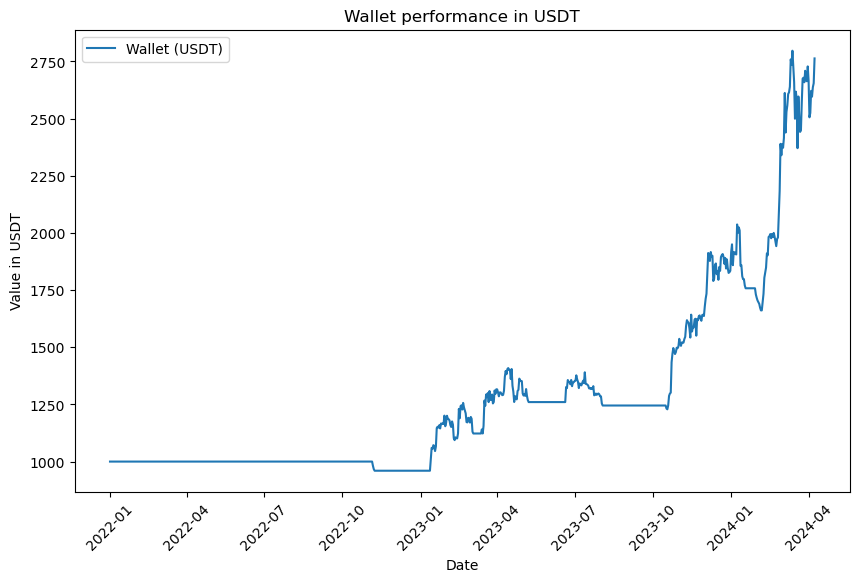

In [28]:
import matplotlib.pyplot as plt

usdt = 1000
btc = 0
lastindex = df.first_valid_index()

# Create lists to stock data wallet
dates = []
wallet = []

for index, row, in df.iterrows():
    if df["close"][lastindex] > df["sma115"][lastindex] and df["close"][lastindex] > df["sma50"][lastindex] and usdt > 10:
        btc = usdt / df["open"][index]
        btc = btc - 0.007 * btc
        usdt = 0
        print("Buy BTC at", df["open"][index], "usdt the", index)

    if df["close"][lastindex] < df["sma115"][lastindex] and btc > 0.0001:
        usdt = btc * df["open"][index]
        usdt = usdt - 0.007 * usdt
        btc = 0
        print("Sell BTC at", df["open"][index], "usdt the", index)
        
    if df["close"][lastindex] < df["sma50"][lastindex] and btc > 0.0001:
        usdt = btc * df["open"][index]
        usdt = usdt - 0.007 * usdt
        btc = 0
        print("Sell BTC at", df["open"][index], "usdt the", index)
        
    lastindex = index
        
    # Ajouter la date et la valeur du portefeuille aux listes
    dates.append(index)
    wallet.append(usdt + btc * df["close"][index])

# Tracer le graphique du portefeuille en USDT
plt.figure(figsize=(10,6))
plt.plot(dates, wallet, label='Wallet (USDT)')
plt.xticks(rotation='45')
plt.xlabel('Date')
plt.ylabel('Value in USDT')
plt.title('Wallet performance in USDT')
plt.legend()
plt.show()

### Print final result and buy and hold result

In [29]:
finalResult = usdt + btc * df["close"].iloc[-1]
performance = (wallet[-1] / wallet[0]) * 100

print(f"Final result : {round(finalResult,2)} usdt (+ {round(performance,2)} %)")

Final result : 2763.07 usdt (+ 276.31 %)


In [30]:
bahResult = (wallet[0] / df["close"].iloc[0]) * df["close"].iloc[-1]
bahPerformance = (bahResult / wallet[0]) * 100

print(f"Buy and hold result : {round(bahResult,2)} usdt (+ {round(bahPerformance,2)} %)")

Buy and hold result : 1512.74 usdt (+ 151.27 %)
